In [1]:
import pandas as pd
import numpy as np
import kaggle
import re

In [94]:
kaggle.api.authenticate()

# https://www.kaggle.com/oscarfry/tvtime-shows?select=tvtimeshows.csv
kaggle.api.dataset_download_files('oscarfry/tvtime-shows', path='./data/tvtimeshows', unzip = True)

# https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney 
kaggle.api.dataset_download_files('ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney', path='./data/streamings', unzip = True)

# https://www.kaggle.com/unanimad/emmy-awards
kaggle.api.dataset_download_files('unanimad/emmy-awards', path='./data/awards', unzip = True)

# https://www.kaggle.com/unanimad/golden-globe-awards
kaggle.api.dataset_download_files('unanimad/golden-globe-awards', path='./data/awards' , unzip = True)

In [3]:
df_tvtime = pd.read_csv('data/tvtimeshows/tvtimeshows.csv')
# df_tvtime.head()

df_streamings = pd.read_csv('data/streamings/tv_shows.csv')
# df_streamings.head()

df_award_emmy = pd.read_csv('data/awards/the_emmy_awards.csv')
# df_award_emmy.head()

df_award_goldenglobe = pd.read_csv('data/awards/golden_globe_awards.csv')
# df_award_goldenglobe.head()

In [2]:
df_extracted = pd.read_csv('status/metacritic.csv')
df_extracted.head()

,name,season,status,tv_network,ano
0,20/20,SEASON 36,Renewed 5/13,ABC,2013
1,America's Funniest Home Videos,SEASON 24,Renewed 5/9,ABC,2013
2,The Assets,NaN,Canceled 1/10 after 2 eps aired,ABC,2013
3,The Astronaut Wives Club,Starts tbd,Delayed to 2015 for creative reasons,ABC,2013
4,The Bachelor,SEASON 18,Renewed 5/9,ABC,2013


In [3]:
def networks_more_popular(df_tt, networks): 
    column_names = list(df_tt.columns)
    df_most_popular = pd.DataFrame(columns = column_names)
    for i in networks:
        df = df_tt[df_tt['tv_network'].str.contains(i, flags=re.IGNORECASE, regex=True, na=False)]
        df_most_popular = df_most_popular.append(df,ignore_index=True)
        df_most_popular['tv_network'] = np.where(df_most_popular['tv_network'].str.contains(i, flags=re.IGNORECASE, regex=True, na=False),i,df_most_popular['tv_network'] )
    return df_most_popular

In [4]:
popular_networks = [ "ABC", "NBC", "NETFLIX", "AMAZON", "DISNEY", "HULU", "HBO", "APPLE", "FOX", "MTV",'FX','CBS','SYFY','THE CW','FREEF','TNT','IFC','STRZ','TVL','SHOWTIME','AMC','USA']
df_extract_most_popular = networks_more_popular(df_extracted,popular_networks)

In [5]:
def standardize_status(df): 

    column_names = list(df.columns)
   #  column_names.append('changed_network')
    df_clean = pd.DataFrame(columns = column_names)
    df_clean = df
   #  df_clean['changed_network'] = False

    dict_status = {
       'canceled' : ['CANCELED','order rescinded','Likely to end','won\'t air','Pulled from schedule','Cancellation','not return','not be moving forward'],
       'renewed' : ['Renew','order','S2 confirmed','return on','Renwed'],
       'renewed_but' : ['Moving from', 'Moves to', 'moved from','Moved from', 'will move to',],
       'delayed' : ['delayed'],
       'end' : ['Ending','ended', 'Final season','miniseries' ],
       'animated' : ['animated','anime'],
       'nacionality':  ['Brazilian' , 'Spanish', 'German', 'Korean', 'Japanese', 'Swedish', 'French', 'Argentinian', 'Austalian', 'British', 'Belgian', 'Polish', 'Chinese', 'Italian', 'Mexican', 'Indian', 'Colombian', 'Thai', 'Taiwanese', 'Turkish', 'Norwegian', 'Lebanese', 'Israeli', 'Arabic', 'Dutch', 'Argentine','UK','Irish','USA', 'Australian', 'Philippine', 'Canadian', 'Russian', 'South African', 'Danish','Finnish']
    }

    for key in dict_status:
       for value in dict_status[key]:
          df_clean['status'] =  np.where(df_clean['status'].str.contains(value, flags=re.IGNORECASE, regex=True, na=False),key,df_clean['status'] )

    return(df_clean)

In [6]:
df_extract_most_popular_cleaning = standardize_status(df_extract_most_popular)

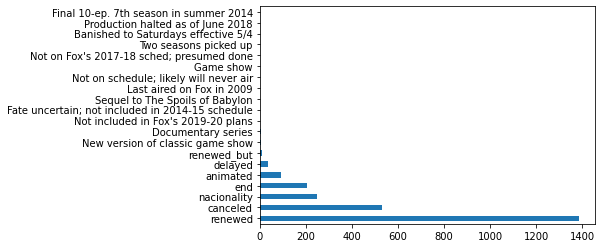

In [7]:
df_extract_most_popular_cleaning['status'].value_counts().head(20).plot.barh()

In [8]:
def select_status(df, status): 
    column_names = list(df.columns)
    df_select = pd.DataFrame(columns = column_names)
    for i in status:
        df_i = df[df['status'].str.contains(i, flags=re.IGNORECASE, regex=True, na=False)]
        df_select = df_select.append(df_i,ignore_index=True)
    return df_select

In [9]:
# status = ['end', 'NAN','canceled', 'renewed_but', 'renewed' , 'delayed']

# df_extract_status = select_status(df_extract_most_popular_cleaning, status)


In [10]:
# df_grouped = df_tvstatus_popular_cleaning[['name', 'season', 'status', 'tv_network', 'ano', 'changed_network']].groupby(df_tvstatus_popular_cleaning['name'])

# df_grouped.describe()